## Data visualization ##

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime


In [60]:
df = pd.read_csv('/Users/davidusuariocasa/Desktop/Projects/ETL_project/Data/scrapped_clean.csv') # We open our CSV


## Evolution of film duration over time ## 

In [61]:
'''First of all, not all winning categories are films, some are documentaries. This kind of categories have a 
shorter duration and are not really movies, so we are going to take them out of our analysis'''

categories_to_take = ['Documentary (short Subject)', 'Short Subject (cartoon)', 'Short Subject (comedy)', 'Short Subject (novelty)', 'Short Subject (color)', 'Short Subject (two-reel)', 'Short Subject (one-reel)', 'Short Subject (live Action)', 'Short Subject (animated)', 'Short Film (animated)', 'Short Film (dramatic Live Action)', 'Short Film (live Action)', 'Documentary', 'Documentary (feature)', 'Documentary (short Subject)', 'Documentary Feature Film', 'Documentary Short Film']

df = df[~df['Winning category'].isin(categories_to_take)]
df = df.reset_index()


In [62]:
'''Now, we check how many remaining movies have a duration of less than 45 mins (as the minimun duration to
be considered a movie), as well as those that didnt get the duration right, and have a 0'''

remaining = df[df['Film Duration'] <=45]

'''Now, we drop the remaining rows from our df, and reset the indexes'''

df = df.drop(remaining.index)
df = df.reset_index()

In [63]:
df

,level_0,index,Film year,Ceremony year,Ceremony number,Winning category,Winner name,Film title,Film Duration,Film score
0,0,0,1927,1928,1,Actor,Emil Jannings,The Last Command,88,80.0
1,1,1,1927,1928,1,Art Direction,William Cameron Menzies,The Dove;,90,65.0
2,2,2,1927,1928,1,Cinematography,Charles Rosher,Sunrise,94,81.0
3,3,3,1927,1928,1,Cinematography,Karl Struss,Sunrise,94,81.0
4,4,4,1927,1928,1,Directing (comedy Picture),Lewis Milestone,Two Arabian Knights,92,67.0
...,...,...,...,...,...,...,...,...,...,...
1707,1717,1931,2022,2023,95,Sound,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,130,83.0
1708,1718,1932,2022,2023,95,Visual Effects,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,192,76.0
1709,1719,1933,2022,2023,95,Writing (adapted Screenplay),Screenplay by Sarah Polley,Women Talking,104,69.0
1710,1720,1934,2022,2023,95,Writing (original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,139,78.0


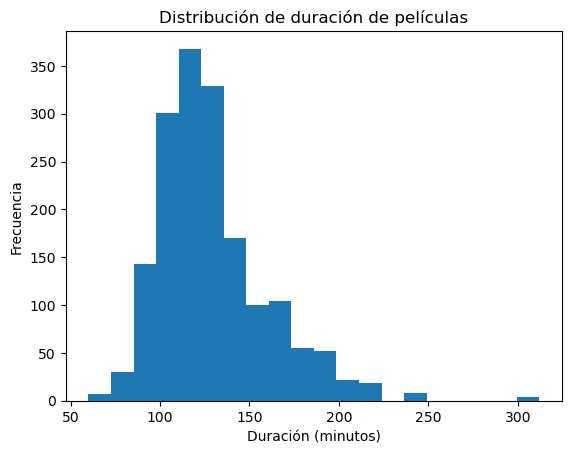

In [64]:
plt.hist(df['Film Duration'], bins=20)
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de duración de películas')
plt.show()